<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
# Inspecting dataframe

cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
# Inspecting dataframe


population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
# Merging cell_phones with population


cell_population = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

In [5]:
# Confirming that shape is (8590, 4)


cell_population.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [6]:
# Inspecting dataframe


geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [7]:
# Inspecting dataframe


cell_population.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [0]:
# Merging the subset of geo_country_codes with cell_population


subset = geo_country_codes[['geo', 'country']]
df = pd.merge(subset, cell_population, how='inner', on='geo')

In [9]:
# Confirming that shape is (8590, 5)

df.shape

(8590, 5)

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [10]:
# Inspecting dataframe

df.head()

,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996351
1,afg,Afghanistan,1965,0.0,9938414
2,afg,Afghanistan,1970,0.0,11126123
3,afg,Afghanistan,1975,0.0,12590286
4,afg,Afghanistan,1976,0.0,12840299


In [0]:
# Calculating cell phones per person and adding it to the dataframe as a new feature

df['cell_phones_per_person'] = (df['cell_phones_total'].astype(float) / df['population_total'].astype(float))

In [12]:
# Checking work

df.tail(485)

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
8105,usa,United States,1988,2069441.0,247739582,0.008353
8106,usa,United States,1989,3508944.0,250113187,0.014029
8107,usa,United States,1990,5283055.0,252529950,0.020921
8108,usa,United States,1991,7557148.0,254974819,0.029639
8109,usa,United States,1992,11032753.0,257454273,0.042853
8110,usa,United States,1993,16009461.0,260020186,0.061570
8111,usa,United States,1994,24134421.0,262741566,0.091856
8112,usa,United States,1995,33785661.0,265658849,0.127177
8113,usa,United States,1996,44042992.0,268803424,0.163848
8114,usa,United States,1997,55312293.0,272136551,0.203252


In [0]:
# I had to check my work using the sloppy method above instead 
# of this, which didn't work. Not sure why.

# df['cell_phones_per_person'].loc[['United States','2017']]

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
# Making it uppercase

df['geo'] = df['geo'].str.upper()

In [15]:
# Making sure I changed from lower to uppercase correctly

df.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
0,AFG,Afghanistan,1960,0.0,8996351,0.0
1,AFG,Afghanistan,1965,0.0,9938414,0.0
2,AFG,Afghanistan,1970,0.0,11126123,0.0
3,AFG,Afghanistan,1975,0.0,12590286,0.0
4,AFG,Afghanistan,1976,0.0,12840299,0.0


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [16]:
df.describe()

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
# Only year 2017

year_2017 = df[df['time'].astype(str) == '2017']

In [19]:
# Confirming it works

year_2017.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
45,AFG,Afghanistan,2017,"23,929,713.0",35530081,0.6735057260353557
91,AGO,Angola,2017,"13,323,952.0",29784193,0.4473497737541521
137,ALB,Albania,2017,"3,497,950.0",2930187,1.19376340144844
183,AND,Andorra,2017,"80,337.0",76965,1.0438121223932957
219,ARE,United Arab Emirates,2017,"19,826,224.0",9400145,2.109140231347495


In [20]:
# Tried this first, but it wasn't so clean...
# I would have had to merge 'ranked' with a subset of year_2017 containing the country and total cell_phones

# ranked = year_2017['cell_phones_total'].value_counts()
# ranked.head()

# This was much easier. Just two lines.
ranked = year_2017.sort_values(by=['cell_phones_total'], ascending=False)
ranked.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1496,CHN,China,2017,"1,474,097,000.0",1409517397,1.0458168186766978
3595,IND,India,2017,"1,168,902,277.0",1339180127,0.8728491809526382
3549,IDN,Indonesia,2017,"458,923,202.0",263991379,1.738402230172827
8134,USA,United States,2017,"395,881,000.0",324459463,1.2201246847283354
1084,BRA,Brazil,2017,"236,488,548.0",209288278,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
# I could also do cell_phones_per_person > 1

more_cells_than_people = df[ df['cell_phones_total'] > df['population_total']]

In [22]:
more_cells_than_people.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
131,ALB,Albania,2011,"3,100,000.0",2926659,1.0592282872722787
132,ALB,Albania,2012,"3,500,000.0",2920039,1.198614128098974
133,ALB,Albania,2013,"3,685,983.0",2918978,1.2627649129250031
134,ALB,Albania,2014,"3,359,654.0",2920775,1.150261146442297
135,ALB,Albania,2015,"3,400,955.0",2923352,1.1633751255408176


In [0]:
# New dataframe

more_cells_than_americans = more_cells_than_people[ more_cells_than_people['geo'] == 'USA']

In [24]:
# Answer to the question: What was the first year that the USA had more cell phones than people?

more_cells_than_americans.head(1)

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
8131,USA,United States,2014,"355,500,000.0",317718779,1.118914031833164


## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
# Separating the relevant countries from all the countries in the dataframe

countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
subset_countries = df.loc[df['country'].isin(countries)]

In [26]:
subset_countries.head(5000)

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1039,BRA,Brazil,1960,0.0,72207554,0.0
1040,BRA,Brazil,1965,0.0,83498020,0.0
1041,BRA,Brazil,1970,0.0,95326793,0.0
1042,BRA,Brazil,1975,0.0,107612100,0.0
1043,BRA,Brazil,1976,0.0,110213082,0.0
1044,BRA,Brazil,1977,0.0,112867867,0.0
1045,BRA,Brazil,1978,0.0,115577669,0.0
1046,BRA,Brazil,1979,0.0,118342626,0.0
1047,BRA,Brazil,1980,0.0,121159761,0.0
1048,BRA,Brazil,1981,0.0,124030908,0.0


In [0]:
# Only using years 2007-2017

subset_countries_years =  subset_countries.loc[(subset_countries['time'].astype(int) > 2006) & (subset_countries['time'].astype(int) < 2018)]

In [28]:
# Checking work

subset_countries_years.head(8134)

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1074,BRA,Brazil,2007,"120,980,103.0",191026637,0.6333153580042348
1075,BRA,Brazil,2008,"150,641,403.0",192979029,0.7806102237150339
1076,BRA,Brazil,2009,"169,385,584.0",194895996,0.869107562373934
1077,BRA,Brazil,2010,"196,929,978.0",196796269,1.000679428531239
1078,BRA,Brazil,2011,"234,357,507.0",198686688,1.1795330092774006
1079,BRA,Brazil,2012,"248,323,703.0",200560983,1.2381456217733038
1080,BRA,Brazil,2013,"271,099,799.0",202408632,1.3393687626918995
1081,BRA,Brazil,2014,"280,728,796.0",204213133,1.3746853195773652
1082,BRA,Brazil,2015,"257,814,274.0",205962108,1.2517558521007175
1083,BRA,Brazil,2016,"244,067,356.0",207652865,1.1753623336716303


In [29]:
# Creating pivot table

pivot_table = subset_countries_years.pivot_table(index='country', 
                   columns='time', 
                   values='cell_phones_total')
pivot_table

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [30]:
# Confirming the shape is correct

pivot_table.shape

(5, 11)

# I also plotted this pivot table so that the data is more easily understood



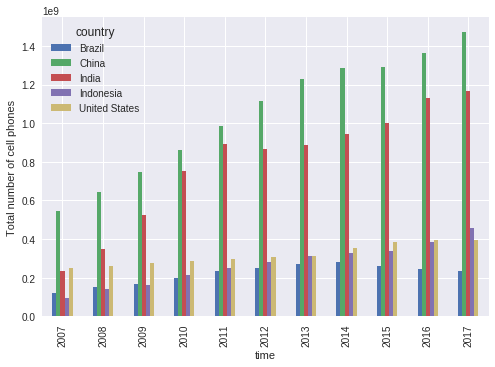

In [31]:
pivot_table_plot = pivot_table.T.plot(kind='bar')
pivot_table_plot.set_ylabel("Total number of cell phones")
pivot_table_plot;

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [32]:
# Just testing this out...

sorted_by_increase = subset_countries_years.sort_values(by=['cell_phones_total'], ascending=False)
sorted_by_increase

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1496,CHN,China,2017,"1,474,097,000.0",1409517397,1.0458168186766978
1495,CHN,China,2016,"1,364,934,000.0",1403500365,0.9725213003418065
1494,CHN,China,2015,"1,291,984,200.0",1397028553,0.9248087286588194
1493,CHN,China,2014,"1,286,093,000.0",1390110388,0.9251732891877361
1492,CHN,China,2013,"1,229,113,000.0",1382793212,0.8888624772913624
3595,IND,India,2017,"1,168,902,277.0",1339180127,0.8728491809526382
3594,IND,India,2016,"1,127,809,000.0",1324171354,0.8517092569576913
1491,CHN,China,2012,"1,112,155,000.0",1375198619,0.8087231797896388
3593,IND,India,2015,"1,001,056,000.0",1309053980,0.7647171280133154
1490,CHN,China,2011,"986,253,000.0",1367480264,0.7212191838989495


In [67]:
# This function will tell me which country had 935,282,277 more cell phones in 2017 versus 2007
from operator import itemgetter

countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
countries_by_increase = []

def get_increase(country):
  limited_to_country = subset_countries_years.loc[subset_countries_years['country'] == country]
  before =  limited_to_country['cell_phones_total'].iloc[0]
  after = limited_to_country['cell_phones_total'].iloc[-1]
  increase = int(after - before)
  #print(int(after - before), "more cell phones in 2017 versus 2007 in ", country)
 
  country_increase = {'country': country, 'increase': increase}
  countries_by_increase.append(country_increase)
 
for country in countries:
  
  get_increase(country)
  
  
if len(countries_by_increase) == 5:
  #print(countries_by_increase)
  sorted_list = sorted(countries_by_increase, key=itemgetter('increase'), reverse=True)
  for item in sorted_list:
    print(item)

{'country': 'India', 'increase': 935282277}
{'country': 'China', 'increase': 926791000}
{'country': 'Indonesia', 'increase': 365536321}
{'country': 'United States', 'increase': 146581000}
{'country': 'Brazil', 'increase': 115508445}


If you have the time and curiosity, what other questions can you ask and answer with this data?